## Desafío Miércoles Semana 4 - Pruebas de Hipótesis
###  Gustavo Morales, G10 - 02.Oct.2019

#### Ejercicio 1

**(1.1)** Para un nivel de confianza de `99%` y un valor de corte de $t_c$ = `2.58`, el valor de prueba $t$ = `11.83` es mayor que $t_c$, por lo tanto podemos **rechazar la hipótesis nula** de que ambos porcentajes no son diferentes. Es decir, hay evidencia para apoyar la idea de que la orientación sexual del encuestador afecta el juicio del encuestado.

**(1.2)** Que incluso asumiendo que son 24 hombres y 24 mujeres, no es una estadística significativa (falta información). Asumiendo además que la hipótesis se refiere al total de la población chilena, yo no considero que sea una muestra considerable para emitir un juicio. Una convención usual es que al menos deberían samplear un 10% de la población para tener una estadística mínimamente robusta. Es decir, que si hay $\sim$ 12 millones de adultos en Chile, deberían estudiar al menos 500 mil hombres y 500 mil mujeres para así poder tener un tamaño muestral considerable para poder rechazar la hipótesis nula (es decir, rechazar que los niveles de consumo son similares entre hombres y mujeres).

#### Ejercicio 2

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
df = pd.read_csv("nations.csv", encoding = "ISO-8859-1")
df = df.drop(columns='Unnamed: 0')

In [3]:
regions = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
for region in regions:
    df['is_'+region] = np.where(df['region']==region, 1, 0)

In [4]:
df.columns

Index(['country', 'region', 'gdp', 'school', 'adfert', 'chldmort', 'life',
       'pop', 'urban', 'femlab', 'literacy', 'co2', 'gini', 'is_Africa',
       'is_Americas', 'is_Asia', 'is_Europe', 'is_Oceania'],
      dtype='object')

#### Ejercicio 3

In [5]:
def test_hip(dataframe, variable, binarize):
    """Given a dataframe with binarized columns, outputs the ttest results."""
    variable_0 = dataframe.query(binarize+'==0')[variable].dropna()
    variable_1 = dataframe.query(binarize+'==1')[variable].dropna()
    
    mean_0 = np.mean(variable_0)
    mean_1 = np.mean(variable_1)
    mean_d = mean_1 - mean_0
    
    # H0 → variable_0 and variable_1 differences in 
    # H1 → variable_0 and variable_1 differ considerably
    t, pvalue = ttest_ind(variable_0, variable_1)
    
    return {'mean_0': mean_0,
            'mean_1': mean_1,
            'mean_diff': mean_d,
            't-test': t,
            'p-value': pvalue}

In [6]:
variables = ['chldmort',  # mortalidad infantil
             'adfert',    # fertilidad adolescente
             'life']      # esperanza de vida al nacer
bin_regions = ['is_Africa', 'is_Americas', 'is_Asia', 'is_Europe', 'is_Oceania']

In [7]:
dic = {}
for var in variables:
    for br in bin_regions:
        d = test_hip(df, var, br)
        dic[var + ' in ' + br[3:]] = d
        print

In [8]:
pd.DataFrame.from_dict(dic, orient='index')

,mean_0,mean_1,mean_diff,t-test,p-value
chldmort in Africa,24.748227,109.750000,85.001773,-14.173677,1.244573e-31
chldmort in Americas,53.052215,23.264286,-29.787929,3.085619,2.333001e-03
chldmort in Asia,51.141379,37.104167,-14.037213,1.602738,1.106449e-01
chldmort in Europe,59.290000,7.046512,-52.243488,6.262400,2.450659e-09
chldmort in Oceania,48.344101,39.416667,-8.927434,0.627778,5.308992e-01
adfert in Africa,36.834507,92.721153,55.886646,-9.444409,1.248167e-17
adfert in Americas,49.206918,63.660000,14.453082,-1.766279,7.893816e-02
adfert in Asia,57.880000,33.865306,-24.014694,3.386270,8.592686e-04
adfert in Europe,62.145033,15.537209,-46.607824,6.797973,1.304088e-10
adfert in Oceania,52.386033,44.993334,-7.392699,0.623132,5.339371e-01


#### Ejercicio 4

La hipótesis nula será que la mortalidad infantil, la fertilidad adolescente y la esperanza de vida de cada región son representativas de las del resto del mundo. Para cada caso consideraré un nivel de significancia de `p` (posibilidad de `p` de fallar en rechazar la hipótesis nula). La hipótesis nula, `H0`, es la que usualmente se explica por efectos de azar. Por ejemplo, `H0` podría ser que la esperanza de vida en africanos es la misma que la de no africanos, como si distribuyeramos a toda la gente del mundo al azar por todos los continentes. En dicho caso, la hipótesis alternativa, `Ha`, sería afirmar que la esperanza de vida en África no es la misma que la del resto del mundo.

Analizaremos por región:

In [9]:
def graph_histograms(dataframe, variable, binarize, alpha):
    variable_0 = dataframe.query(binarize+'==0')[variable].dropna()
    variable_1 = dataframe.query(binarize+'==1')[variable].dropna()
    plt.title(variable)
    plt.hist(variable_0, alpha=alpha, label='not_'+binarize[3:], color='tomato')
    plt.axvline(np.mean(variable_0), color='red')
    plt.hist(variable_1, alpha=alpha, label=binarize[3:], color='dodgerblue')
    plt.axvline(np.mean(variable_1), color='blue')
    plt.legend()

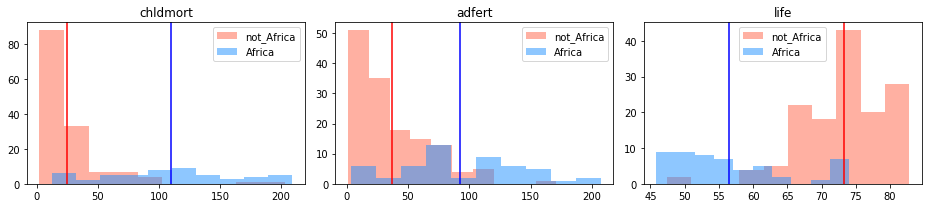

In [10]:
plt.rcParams['figure.figsize'] = 13, 3
for i,var in enumerate(variables):
    plt.subplot(1, len(variables), i+1)
    graph_histograms(df, var, 'is_'+regions[0], 0.5)
plt.tight_layout()

In [11]:
aux = [var + ' in ' + reg for reg in regions for var in variables]
dfs = [pd.DataFrame.from_dict(dic[a], orient='index', columns=[a]) for a in aux]
pd.concat([dfs[0], dfs[1], dfs[2]], axis=1)

,chldmort in Africa,adfert in Africa,life in Africa
mean_0,2.474823e+01,3.683451e+01,7.321115e+01
mean_1,1.097500e+02,9.272115e+01,5.649038e+01
mean_diff,8.500177e+01,5.588665e+01,-1.672077e+01
t-test,-1.417368e+01,-9.444409e+00,1.517460e+01
p-value,1.244573e-31,1.248167e-17,1.071399e-34


**(Africa)** Todos los p-values dan considerablemente menores que `0.001`, lo cuál quiere decir que hay evidencia para rechazar la hipótesis nula en los tres casos. Es decir, podemos afirmar con bastante certeza que la mortalidad infantil, la fertilidad adolescente y la esperanza de vida en África no son representativas de las del resto del mundo.

---

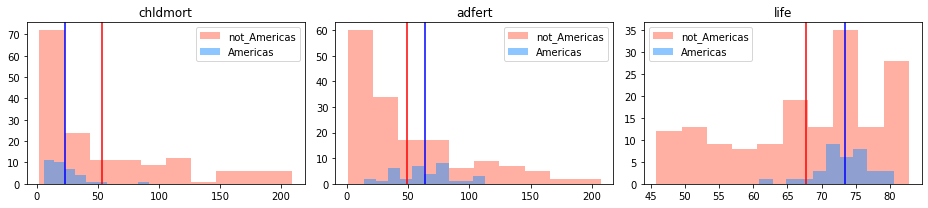

In [12]:
for i,var in enumerate(variables):
    plt.subplot(1, len(variables), i+1)
    graph_histograms(df, var, 'is_'+regions[1], 0.5)
plt.tight_layout()

In [13]:
pd.concat([dfs[3], dfs[4], dfs[5]], axis=1)

,chldmort in Americas,adfert in Americas,life in Americas
mean_0,53.052215,49.206918,67.689832
mean_1,23.264286,63.660000,73.451428
mean_diff,-29.787929,14.453082,5.761596
t-test,3.085619,-1.766279,-3.138415
p-value,0.002333,0.078938,0.001967


**(Americas)** En este caso, con una significancia de `0.01`, hay evidencia para rechazar la hipótesis de que la mortalidad infantil y la esperanza de vida sean representativas de las del resto del mundo. No hay evidencia para rechazar la hipótesis nula en el caso de la fertilidad adolescente.

---

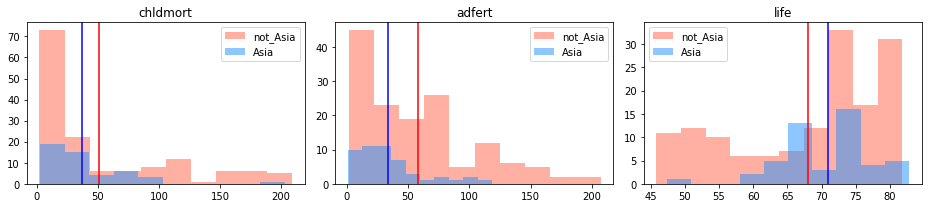

In [14]:
for i,var in enumerate(variables):
    plt.subplot(1, len(variables), i+1)
    graph_histograms(df, var, 'is_'+regions[2], 0.5)
plt.tight_layout()

In [15]:
pd.concat([dfs[6], dfs[7], dfs[8]], axis=1)

,chldmort in Asia,adfert in Asia,life in Asia
mean_0,51.141379,57.880000,68.005057
mean_1,37.104167,33.865306,70.872449
mean_diff,-14.037213,-24.014694,2.867392
t-test,1.602738,3.386270,-1.734672
p-value,0.110645,0.000859,0.084404


**(Asia)** Con una significancia de un `0.01`, sólo hay evidencia para rechazar la hipótesis nula en el caso de la fertilidad adolescente.

---

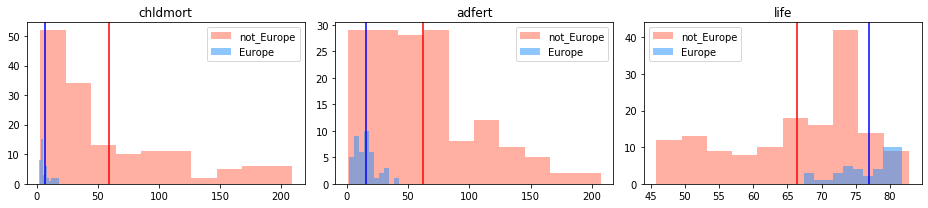

In [16]:
for i,var in enumerate(variables):
    plt.subplot(1, len(variables), i+1)
    graph_histograms(df, var, 'is_'+regions[3], 0.5)
plt.tight_layout()

In [17]:
pd.concat([dfs[9], dfs[10], dfs[11]], axis=1)

,chldmort in Europe,adfert in Europe,life in Europe
mean_0,5.929000e+01,6.214503e+01,6.638951e+01
mean_1,7.046512e+00,1.553721e+01,7.694574e+01
mean_diff,-5.224349e+01,-4.660782e+01,1.055622e+01
t-test,6.262400e+00,6.797973e+00,-6.735356e+00
p-value,2.450659e-09,1.304088e-10,1.849161e-10


**(Europe)** Con una significancia de un `0.001`, hay evidencia considerable para rechazar la hipótesis nula en los tres casos.

---

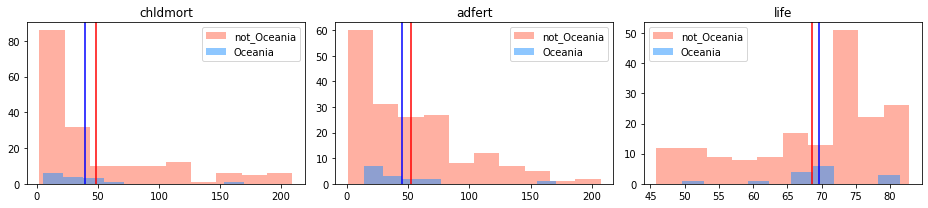

In [18]:
for i,var in enumerate(variables):
    plt.subplot(1, len(variables), i+1)
    graph_histograms(df, var, 'is_'+regions[4], 0.5)
plt.tight_layout()

In [19]:
pd.concat([dfs[12], dfs[13], dfs[14]], axis=1)

,chldmort in Oceania,adfert in Oceania,life in Oceania
mean_0,48.344101,52.386033,68.657635
mean_1,39.416667,44.993334,69.584445
mean_diff,-8.927434,-7.392699,0.926810
t-test,0.627778,0.623132,-0.342111
p-value,0.530899,0.533937,0.732642


**(Oceania)** No hay evidencia para rechazar la hipótesis nula en ningún caso.

Notar que la diferencia de los promedios no es necesariamente una buena medida de qué tan "similares" son dos muestras.

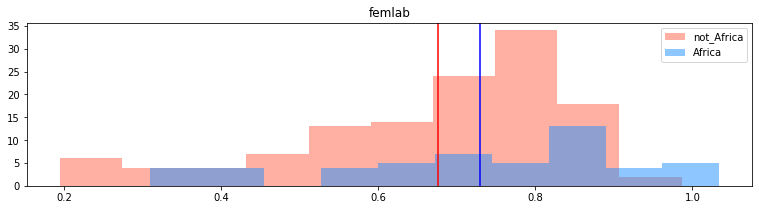

In [20]:
graph_histograms(df, 'femlab', 'is_Africa', 0.5)

In [21]:
test_hip(df, 'femlab', 'is_Africa')

{'mean_0': 0.6761015881858174,
 'mean_1': 0.7299098010156667,
 'mean_diff': 0.05380821282984927,
 't-test': -1.783872878266046,
 'p-value': 0.0761771840435915}

In [22]:
test_hip(df, 'literacy', 'is_Africa')

{'mean_0': 90.19857935471968,
 'mean_1': 65.30851067887976,
 'mean_diff': -24.890068675839927,
 't-test': 8.909991173873896,
 'p-value': 3.3857112156459963e-15}